## How `n_min_threshold` changes what features are detected

#### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tobac
import xarray as xr

#### Generate Feature Data

Here, we will generate some simple feature data with a variety of features, large and small. 

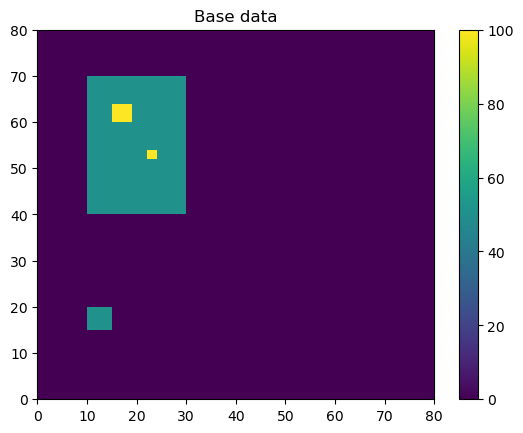

In [2]:
# Dimensions here are time, y, x.
input_field_arr = np.zeros((1, 80, 80))
# small 5x5 feature, area of 25 points
input_field_arr[0, 15:20, 10:15] = 50
# larger 30x30 feature, area of 900
input_field_arr[0, 40:70, 10:30] = 50
# small 2x2 feature within larger 30x30 feature, area of 4 points
input_field_arr[0, 52:54, 22:24] = 100
# small 4x4 feature within larger 30x30 feature, area of 16 points
input_field_arr[0, 60:64, 15:19] = 100

plt.pcolormesh(input_field_arr[0])
plt.colorbar()
plt.title("Base data")
plt.show()

In [3]:
# We now need to generate an Iris DataCube out of this dataset to run tobac feature detection.
# One can use xarray to generate a DataArray and then convert it to Iris, as done here.
input_field_iris = xr.DataArray(
    input_field_arr,
    dims=["time", "Y", "X"],
    coords={"time": [np.datetime64("2019-01-01T00:00:00")]},
).to_iris()
# Version 2.0 of tobac (currently in development) will allow the use of xarray directly with tobac.

***

#### No `n_min_threshold`
If we keep `n_min_threshold` at the default value of `0`, all three features will be detected with the appropriate thresholds used.

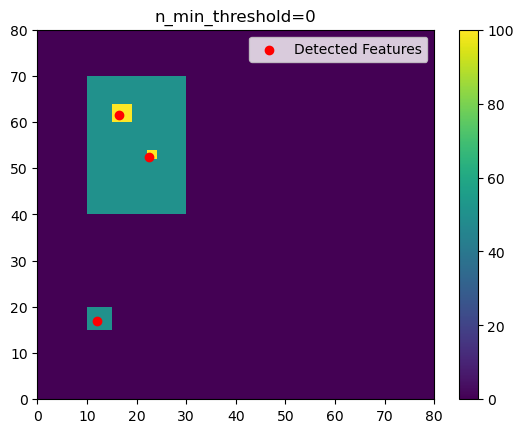

In [4]:
thresholds = [50, 100]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold="center",
    sigma_threshold=0,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("n_min_threshold=0")
plt.show()

***

#### Increasing `n_min_threshold`
As we increase `n_min_threshold`, fewer of these separate features are detected. In this example, if we set `n_min_threshold` to 5, the smallest detected feature goes away. 

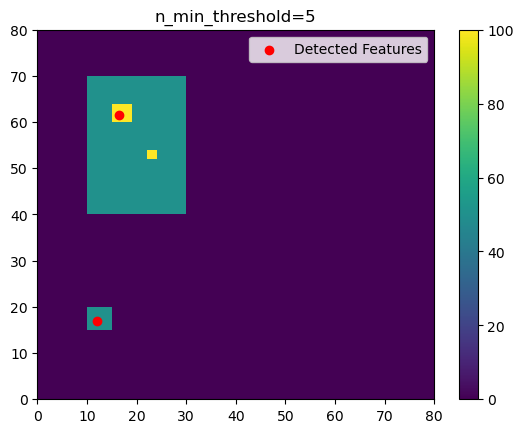

In [5]:
thresholds = [50, 100]
n_min_threshold = 5
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold="center",
    sigma_threshold=0,
    n_min_threshold=n_min_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

If we increase `n_min_threshold` to 20, only the large 50-valued feature is detected, rather than the two higher-valued squares.

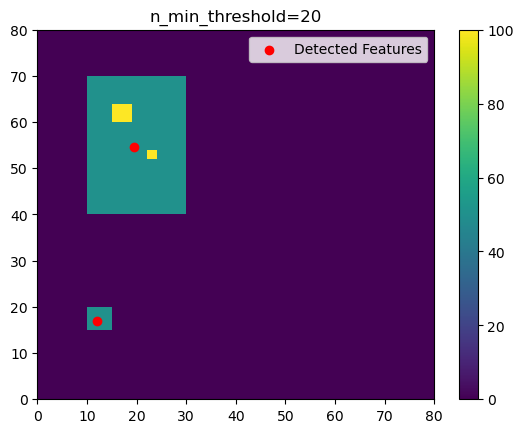

In [6]:
thresholds = [50, 100]
n_min_threshold = 20
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold="center",
    sigma_threshold=0,
    n_min_threshold=n_min_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

If we set `n_min_threshold` to 100, only the largest feature is detected.

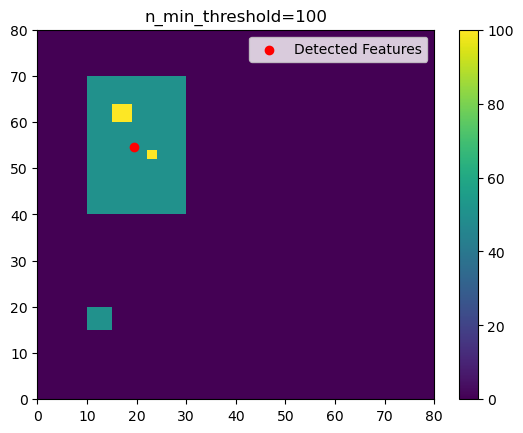

In [7]:
thresholds = [50, 100]
n_min_threshold = 100
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold="center",
    sigma_threshold=0,
    n_min_threshold=n_min_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

#### Different `n_min_threshold` for different threshold values 

Another option is to use different `n_min_threshold` values for different threshold values. This can be practical because extreme values are usually not as widespread as less extreme values (think for example of the rain rates in a convective system). 

If we set `n_min_threshold` to 100 for the lower threshold and to 5 for the higher threshold, only the larger 50-valued features are detected, but at the same time we make sure that the smaller areas with the 100-valued features are still detected: 

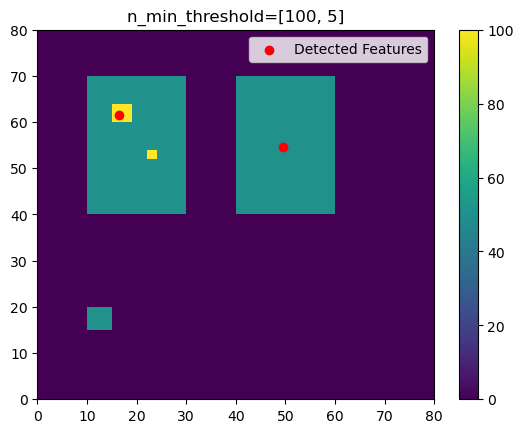

In [8]:
thresholds = [50, 100]

# defining multiple n_min_threshold:
n_min_threshold = [100, 5]
# alternatively, these could be given as a dictionary: n_min_threshold = {50:100,100: 5}

# let's add another larger 30x30 feature, area of 900 to make the example more clear
input_field_iris.data[0, 40:70, 40:60] = 50

# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold="center",
    sigma_threshold=0,
    n_min_threshold=n_min_threshold,
)


plt.pcolormesh(input_field_iris.data[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

#### Strict Thresholding (`strict_thresholding`)

Sometimes it may be desirable to detect only features that satisfy *all* specified `n_min_threshold` thresholds. This can be achieved with the optional argument `strict_thresholding=True`.

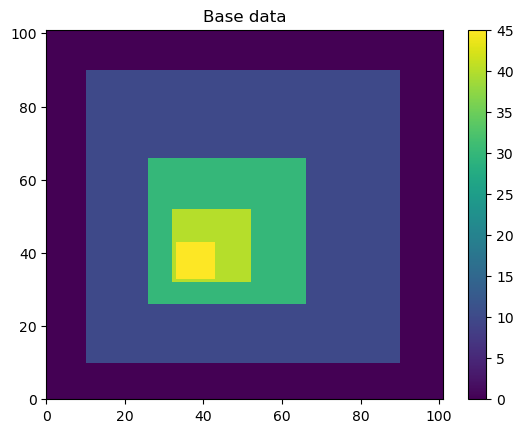

In [9]:
# As above, we create test data to demonstrate the effect of strict_thresholding
input_field_arr = np.zeros((1, 101, 101))

for idx, side in enumerate([40, 20, 10, 5]):
    input_field_arr[
        :,
        (50 - side - 4 * idx) : (50 + side - 4 * idx),
        (50 - side - 4 * idx) : (50 + side - 4 * idx),
    ] = (
        50 - side
    )

input_field_iris = xr.DataArray(
    input_field_arr,
    dims=["time", "Y", "X"],
    coords={"time": [np.datetime64("2019-01-01T00:00:00")]},
).to_iris()

plt.pcolormesh(input_field_arr[0])
plt.colorbar()
plt.title("Base data")
plt.show()

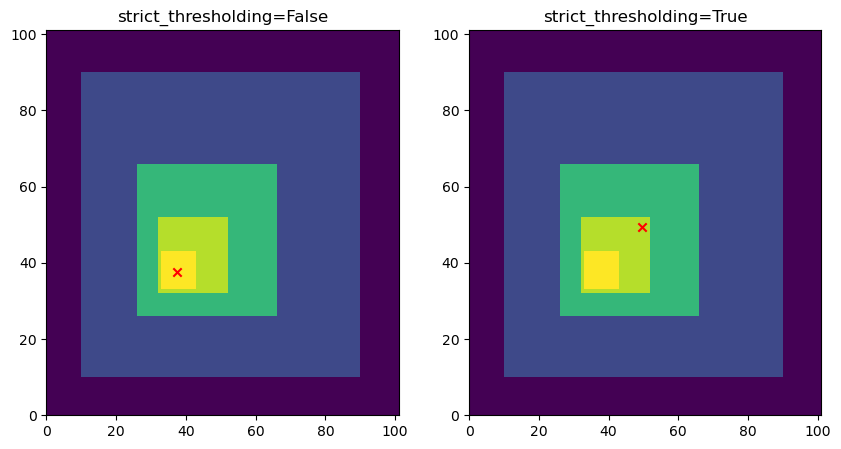

In [10]:
thresholds = [8, 29, 39, 44]

n_min_thresholds = [79**2, input_field_arr.size, 8**2, 3**2]

f = plt.figure(figsize=(10, 5))

# perform feature detection with and without strict thresholding and display the results side by side

for idx, strict in enumerate((False, True)):
    features_demo = tobac.feature_detection_multithreshold(
        input_field_iris,
        dxy=1000,
        threshold=thresholds,
        n_min_threshold=n_min_thresholds,
        strict_thresholding=strict,
    )
    ax = f.add_subplot(121 + idx)
    ax.pcolormesh(input_field_iris.data[0])
    ax.set_title(f"strict_thresholding={strict}")
    ax.scatter(
        x=features_demo["hdim_2"].values,
        y=features_demo["hdim_1"].values,
        marker="x",
        color="r",
        label="Detected Features",
    )

The effect of `strict_thresholding` can be observed in the plot above: Since the second `n_min_threshold` is not reached, no further features can be detected at higher `threshold` values. In the case of non strict thresholding, the feature with the highest value is still detected even though a previous `n_min_threshold` was not reached.